In [1]:
using StatsBase, IterTools, Plots, DataFrames, JLD2, StatPlots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [3]:
#Plot the data now

@load "data/multi-out.jld2"

σs = [ 0.02, 0.04, 0.06, 0.1, 0.14]

testdf1 = DataFrame(σ = σs,
                    n1 = test_results[1] |>collect,
                    n5 = test_results[2] |> collect,
                    n10 = test_results[3] |> collect)


,σ,n1,n5,n10
1,0.02,"[6, 10, 7, 7, 10, 7, 63, 9, 6, 9, 22, 23, 6, 6, 78, 6, 58, 9, 6, 11, 5, 7, 15, 5, 26, 8, 51, 11, 10, 27, 8, 7, 6, 9, 90, 5, 8, 6, 6, 7, 8, 12, 8, 36, 7, 5, 18, 7, 7, 7, 11, 8, 32, 65, 7, 7, 7, 6, 8, 8, 6, 6, 6, 6, 7, 8, 8, 6, 23, 7, 5, 6, 6, 9, 8, 7, 8, 7, 7, 9, 12, 14, 15, 6, 7, 8, 5, 8, 22, 9, 6, 6, 8, 6, 6, 11, 21, 14, 9, 6]","[288, 234, 249, 248, 341, 193, 261, 294, 301, 296, 244, 243, 239, 244, 229, 326, 290, 222, 299, 231, 232, 230, 272, 286, 234, 267, 295, 216, 269, 266, 346, 264, 238, 261, 229, 313, 210, 338, 305, 267, 286, 305, 251, 273, 276, 243, 306, 256, 259, 266, 226, 260, 347, 305, 233, 296, 305, 291, 269, 262, 251, 220, 245, 231, 225, 317, 308, 260, 284, 274, 247, 273, 262, 233, 310, 297, 259, 310, 436, 220, 291, 261, 241, 336, 248, 277, 358, 277, 264, 224, 234, 322, 297, 215, 242, 277, 291, 292, 279, 259]","[488, 472, 488, 473, 477, 473, 497, 478, 477, 460, 461, 485, 483, 480, 491, 468, 493, 433, 489, 472, 479, 485, 484, 476, 470, 473, 471, 474, 492, 471, 492, 464, 478, 469, 490, 487, 461, 489, 480, 493, 479, 474, 483, 490, 495, 493, 489, 490, 474, 488, 495, 494, 487, 483, 491, 487, 491, 485, 456, 454, 495, 488, 486, 480, 492, 484, 493, 476, 484, 465, 468, 481, 481, 476, 482, 477, 483, 476, 468, 491, 470, 476, 491, 478, 484, 477, 468, 493, 479, 485, 463, 495, 489, 491, 490, 465, 476, 491, 485, 489]"
2,0.04,"[3, 3, 3, 3, 3, 3, 3, 22, 3, 3, 3, 3, 3, 3, 3, 3, 28, 3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 17, 28, 4, 22, 3, 21, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 4, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 20, 3, 3, 3, 3, 3, 6, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]","[143, 44, 94, 42, 175, 68, 62, 192, 151, 273, 90, 155, 135, 69, 123, 98, 50, 89, 203, 87, 85, 118, 131, 108, 81, 149, 168, 187, 79, 134, 217, 128, 115, 80, 113, 84, 55, 175, 52, 238, 100, 137, 138, 120, 246, 108, 73, 176, 156, 51, 46, 154, 275, 209, 113, 227, 213, 65, 55, 123, 223, 172, 192, 86, 168, 57, 45, 69, 56, 199, 102, 87, 181, 53, 107, 109, 192, 59, 50, 64, 93, 159, 52, 126, 108, 137, 51, 69, 46, 148, 128, 51, 93, 150, 110, 98, 57, 51, 112, 98]","[355, 298, 319, 307, 334, 276, 286, 351, 332, 260, 303, 297, 324, 325, 315, 317, 333, 327, 275, 275, 299, 343, 279, 292, 373, 369, 250, 302, 313, 315, 386, 311, 329, 269, 365, 282, 368, 320, 327, 342, 335, 315, 314, 296, 272, 323, 305, 329, 337, 363, 345, 324, 322, 364, 346, 301, 261, 307, 308, 352, 351, 299, 416, 326, 303, 460, 265, 382, 358, 294, 419, 315, 311, 322, 364, 334, 314, 354, 273, 328, 324, 336, 348, 247, 381, 285, 340, 287, 325, 322, 318, 305, 372, 285, 345, 361, 342, 329, 297, 396]"
3,0.06,"[19, 2, 2, 2, 2, 12, 5, 6, 10, 4, 2, 2, 7, 23, 2, 121, 2, 9, 10, 4, 16, 2, 16, 2, 2, 11, 69, 7, 8, 16, 17, 4, 6, 8, 7, 10, 10, 2, 6, 9, 2, 2, 6, 5, 2, 17, 26, 9, 2, 2, 18, 93, 2, 37, 37, 2, 2, 2, 20, 12, 40, 2, 2, 2, 2, 2, 4, 2, 34, 10, 2, 3, 15, 9, 2, 6, 2, 2, 4, 31, 61, 2, 7, 2, 2, 26, 2, 10, 2, 25, 13, 2, 5, 2, 44, 2, 7, 7, 8, 8]","[67, 82, 145, 116, 66, 54, 54, 177, 440, 104, 197, 83, 60, 91, 54, 65, 64, 137, 75, 237, 145, 224, 108, 66, 344, 58, 114, 296, 122, 98, 67, 83, 183, 51, 30, 73, 260, 70, 169, 52, 70, 152, 97, 50, 90, 101, 93, 74, 78, 56, 81, 73, 80, 50, 77, 90, 342, 103, 126, 67, 117, 105, 134, 93, 61, 114, 165, 152, 70, 109, 149, 81, 169, 86, 121, 77, 56, 295, 60, 57, 82, 175, 29, 129, 75, 174, 87, 68, 17, 64, 78, 115, 190, 77, 72, 77, 96, 177, 78, 192]","[284, 204, 251, 244, 285, 232, 220, 221, 233, 290, 206, 289, 205, 256, 247, 199, 209, 256, 249, 263, 223, 230, 214, 400, 276, 458, 432, 204, 199, 232, 225, 297, 204, 233, 289, 384, 218, 219, 173, 239, 258, 215, 181, 231, 227, 252, 427, 264, 238, 374, 245, 228, 470, 204, 209, 227, 220, 228, 204, 231, 199, 250, 316, 261, 250, 219, 347, 214, 192, 201, 203, 209, 184, 227, 344, 411, 194, 247, 283, 233, 313, 257, 269, 266, 201, 246, 308, 192, 266, 276, 231, 241, 243, 270, 303, 195, 220, 248, 211, 226]"
4,0.1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1

  likely near In[15]:11


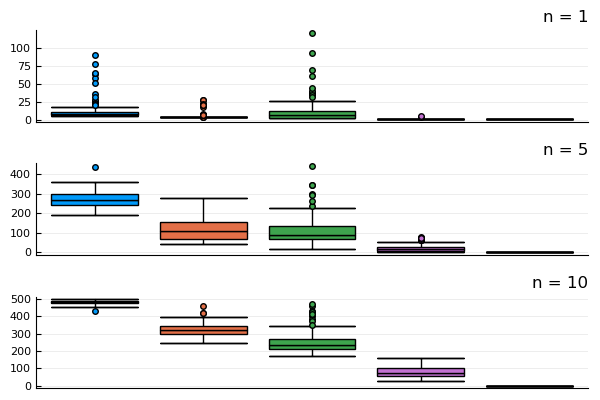

In [15]:

using Measures
fig1 = plot(show = false)
fig2 = plot(show = false)
fig3 = plot(show = false)

@df testdf1 boxplot!(fig1,:n1, legend=false, xticks = nothing, title = "n = 1")
@df testdf1 boxplot!(fig2,:n5, legend=false, xticks = nothing, title = "n = 5")
@df testdf1 boxplot!(fig3,:n10, legend=false, xticks = nothing, title = "n = 10")

finalfig = plot(fig1,fig2,fig3, layout = grid(3,1),
                margin = 3mm, title_location = :right,
                titlefont =Plots.Font("sans-serif",12,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)))

In [11]:
savefig("image/testbox.png")

  likely near In[2]:21


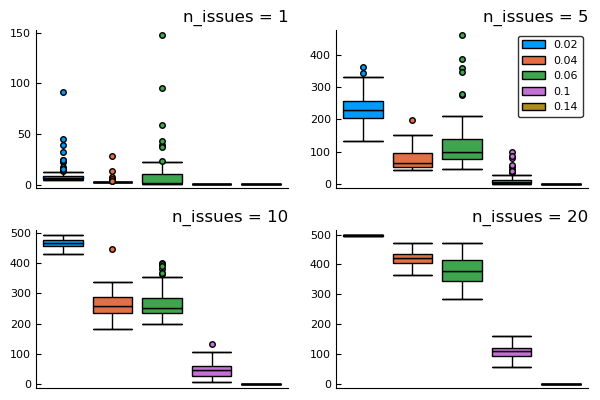

/home/marcelomaciel/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
@load "data/multi-out2.jld2"
σs = [ 0.02, 0.04, 0.06, 0.1, 0.14]

testdf2 = DataFrame(σ = σs,
                    n1 = test_results[1] |>collect,
                    n5 = test_results[2] |> collect,
                    n10 = test_results[3] |> collect, n20 =test_results[4] |> collect)
using Measures
fig1 = plot(show = false)
fig2 = plot(show = false)
fig3 = plot(show = false)
fig4 = plot(show = false)

@df testdf2 boxplot!(fig1,:n1, legend=false, xticks = nothing, title = "n_issues = 1", grid = false)
@df testdf2 boxplot!(fig2,:n5, legend=:outertopright, label = reshape(σs,1,:),
    xticks = nothing, title = "n_issues = 5",  grid = false)
@df testdf2 boxplot!(fig3,:n10, legend=false, xticks = nothing, title = "n_issues = 10", grid = false)
@df testdf2 boxplot!(fig4,:n20, legend=false, xticks = nothing, title = "n_issues = 20", grid = false)


finalfig = plot(fig1,fig2,fig3, fig4,
    margin = 3mm, title_location = :right,
    titlefont =Plots.Font("sans-serif",12,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0)))

In [4]:
savefig("image/testbox3.svg")
